In [1]:
import pandas as pd
df = pd.read_csv("iris.data")

In [85]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_1 = X[(y == 0) | (y == 1)]
y_1 = y[(y == 0) | (y == 1)]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=1, stratify=y_1)

In [87]:
import numpy as np
class LogisticRegression(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        perceptron との違いは活性化関数が存在する点、重みの更新の点の方法（活性化関数による）
        """
        
        random = np.random.RandomState(self.random_state)
        self.w_ = random.normal(loc=0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        #np.clip(x, max, min): 
        #z: 処理する配列
        #max, min: 処理後の値の最大値、最小値
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.5, 1, 0)

In [88]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

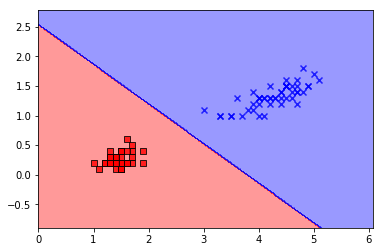

In [89]:
import matplotlib.pyplot as plt
lr = LogisticRegression(n_iter=1000)
lr.fit(X_train, y_train)
plot_decision_regions(X_1, y_1, classifier = lr)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [91]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [92]:
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

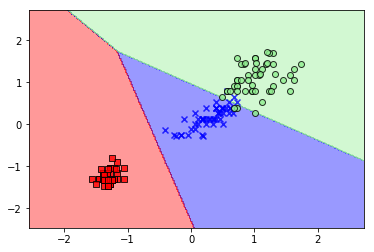

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, random_state=1)

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr.fit(X_combined, y_combined)

plot_decision_regions(X_combined, y_combined, classifier=lr)
plt.show()

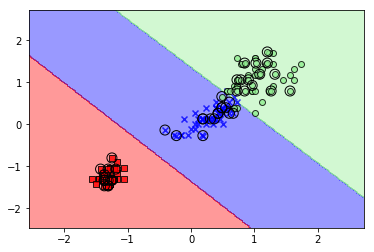

In [95]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined, y_combined, classifier=svm, test_idx=range(105,150))
plt.show()